# 信號與系統實習期末專題: 心跳信號量測

## 時程表

* 12/19 分組、發放材料、Arduino 實驗板測試、心跳波形顯示
* 12/26 自由使用實驗教室 9:10~11:30
* 1/2 期末demo

## 期末專題評分方式

## (一) 即時心跳波形顯示佔 40%
* Arduino 類比數位轉換參考程式碼 https://github.com/htygithub/SS_EXP/blob/master/heartbeat/analogread2.ino
* Python 即時繪圖參考程式碼 https://github.com/htygithub/SS_EXP/blob/master/heartbeat/pulse_plot.py
* 注意：嘗試計算並濾除直流準位會得到較好顯示效果

## (二) 書面報告佔 20%
* <b>每人</b>各别繳交一份，並附上組員互相評分，例如組員AB, A: 90，B:80
* 報告繳交(1/1 5:00 PM)之前以pdf格式email至教師信箱 tyhuang@mail.ntust.edu.tw
* 報告應包含(0)題目、組別、組員(1)簡介 (2)實驗方法及材料 (3)實驗結果 (4)結果討論 (5)參考文獻(若無，則寫無) (6)組員互相評分
* 報告若包含任何於網路下載複製之文字或圖片，則報告以-100分計算
* 請注意，報告需每人繳交一份，報告格式參考 https://tinyurl.com/rmcdghb
* 除同隊組員外，各組間內容互相抄襲者，則報告以-100分計算。
* 期末報告頁數應以1-2頁為原則
* 每組應將程式碼上傳Github管理，並於報告中附上github連結
* 除參考程式碼外，各組間程式碼互相抄襲者，則期末專題分數以零分計算



## (三)額外加分項目各佔 5%
* (1)即時信號頻譜顯示，橫軸以 (Hz)計算，並能看出心跳頻帶
* (2)設計一FIR filter ，說明其設計過濾頻帶，畫出頻率響應圖，並顯示即時顯示信號濾波前後結果。
* (3)以z-domain plot畫出你所設計的FIR濾波器之零點極點，注意，零點應調整增益使其位置在單位圓上
* (4)即時心率計算
* (5)1分鐘期末專題簡介影片製作，影片繳交(1/1 5:00 PM)之前以youtube連結繳交
* (6)以科學實驗量測並記錄十人以上之心率，並探討系統之量測準確性，詳述於書面報告中
* (7)視窗介面製作，應具備(按鈕、心率、濾波功能等要素)



## (四)任選加分項目最多選擇一項，佔10%
* (1)手機連結顯示波形及心率
* (2)以網頁雲端介面即時顯示心跳波形及心率計算
* (3)心率變異性(Heart Rate Variability, HRV)計算
* (4)以AI模型辨認脈波之波峰

## (五)組員人數
* 以上(三)、(四)加分項目
* 組員為1人: (三+四)*1.05
* 組員為2人: (三+四)*1
* 組員為3人: (三+四)*0.95







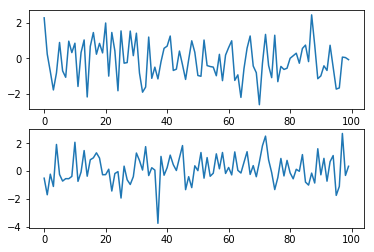

plotting data...


SerialException: could not open port 'com6': PermissionError(13, '存取被拒。', None, 5)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import time, random
import math
import serial
from collections import deque



#Display loading 
class PlotData:
    def __init__(self, max_entries=30):
        self.axis_x = deque(maxlen=max_entries)
        self.axis_y = deque(maxlen=max_entries)
    def add(self, x, y):
        self.axis_x.append(x)
        self.axis_y.append(y)


#initial
fig, (ax,ax2) = plt.subplots(2,1)
line,  = ax.plot(np.random.randn(100))
line2, = ax2.plot(np.random.randn(100))
plt.show(block = False)
plt.setp(line2,color = 'r')



PData= PlotData(500)
ax.set_ylim(200,300)
ax2.set_ylim(200,300)



# plot parameters
print ('plotting data...')
# open serial port
strPort='com6'
ser = serial.Serial(strPort, 115200)
ser.flush()

start = time.time()

while True:
    
    for ii in range(10):

        try:
            data = float(ser.readline())
            PData.add(time.time() - start, data)
        except:
            pass

    ax.set_xlim(PData.axis_x[0], PData.axis_x[0]+5)
    ax2.set_xlim(PData.axis_x[0], PData.axis_x[0]+5)
    line.set_xdata(PData.axis_x)
    line.set_ydata(PData.axis_y)
    line2.set_xdata(PData.axis_x)
    line2.set_ydata(PData.axis_y)
    fig.canvas.draw()
    fig.canvas.flush_events()


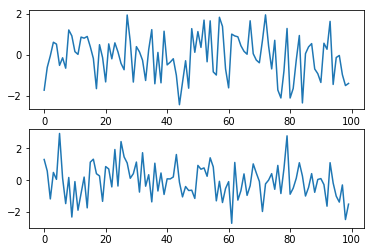

plotting data...


IndexError: deque index out of range

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import time
import time, random
import math
import serial
from collections import deque



#Display loading 
class PlotData:
    def __init__(self, max_entries=30):
        self.axis_x = deque(maxlen=max_entries)
        self.axis_y = deque(maxlen=max_entries)
    def add(self, x, y):
        self.axis_x.append(x)
        self.axis_y.append(y)


#initial
fig, (ax,ax2) = plt.subplots(2,1)
line,  = ax.plot(np.random.randn(100))
line2, = ax2.plot(np.random.randn(100))
plt.show(block = False)
plt.setp(line2,color = 'r')



PData= PlotData(500)
ax.set_ylim(0,500)
ax2.set_ylim(0,500)

PData2= PlotData(500)
ax.set_ylim(0,500)
ax2.set_ylim(0,500)


# plot parameters
print ('plotting data...')
# open serial port
strPort='com6'
ser = serial.Serial(strPort, 115200)
ser.flush()

start = time.time()

temp = deque(maxlen = 20) 

while True:
    
    mean = 0
    
    for ii in range(10):

        try:
            data = float(ser.readline())
            temp.append(data)
            
            pData.add(time.time() - start, data-np.mean(temp))
            PData2.add(time.time() - start, data)
        except:
            pass

    ax.set_xlim(PData.axis_x[0], PData.axis_x[0]+5)
    ax2.set_xlim(PData2.axis_x[0], PData2.axis_x[0]+5)
    line.set_xdata(PData.axis_x)
    line.set_ydata(PData.axis_y)
    line2.set_xdata(PData2.axis_x)
    line2.set_ydata(PData2.axis_y)
    fig.canvas.draw()
    fig.canvas.flush_events()
